Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading te datasets

In [2]:
tt_df = pd.read_csv('E:\Capstone Project\Project\Dataset\social media influencers - tiktok.csv')
yt_df = pd.read_csv('E:\Capstone Project\Project\Dataset\social media influencers - youtube.csv')
ig_df = pd.read_csv('E:\Capstone Project\Project\Dataset\social media influencers - instagram.csv')

In [3]:
import re
def convert(x):
    return re.findall('\d+\.?\d*', x)


In [4]:
def change(df, list1):
    for i in list1:
        df['new'+i] = df[i].apply(convert)
        df['new'+i] = df['new'+i].apply(lambda x: "".join(x))
        df['new'+i]=pd.to_numeric(df['new'+i])
        df['new'+i]=np.where(['M' in j for j in df[i]],df['new'+i]*1000000,np.where(['K' in j1 for j1 in df[i]],df['new'+i]*1000,df['new'+i]))
    return df

Tiktok Analysis

In [5]:
tt_df.head()

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K


In [6]:
tt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tiktoker name      1000 non-null   object
 1   Tiktok name        998 non-null    object
 2   Subscribers count  1000 non-null   object
 3   Views avg.         1000 non-null   object
 4   Likes avg          1000 non-null   object
 5   Comments avg.      1000 non-null   object
 6   Shares avg         1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [7]:
tt_df.describe()

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
count,1000,998,1000,1000,1000,1000,1000
unique,987,980,412,126,883,228,385
top,tommyinnit,Tommy,1.6M,1.7M,1.2M,1.2K,1.3K
freq,2,3,21,52,9,42,30


In [8]:
tt_df.isnull().sum()

Tiktoker name        0
Tiktok name          2
Subscribers count    0
Views avg.           0
Likes avg            0
Comments avg.        0
Shares avg           0
dtype: int64

In [9]:
tt_df['Subscribers count'].str[-1].value_counts()

Subscribers count
M    797
K    203
Name: count, dtype: int64

In [10]:
tt_df.drop_duplicates()

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K
...,...,...,...,...,...,...,...
995,nicolebernaal,nicolebernaal,4M,2.2M,351.3K,957,195
996,bellaretamosa,bella,5.1M,2.5M,340.4K,901,145
997,tunico80,🌠Antonio Tonon🌠,5.8M,1M,206.8K,2K,2.1K
998,armon.warren,Armoney,1.2M,1.9M,300.8K,904,630


In [11]:
change(tt_df, ['Subscribers count'])

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg,newSubscribers count
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K,221700.0
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K,22200000.0
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K,2100000.0
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K,135400000.0
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K,11400000.0
...,...,...,...,...,...,...,...,...
995,nicolebernaal,nicolebernaal,4M,2.2M,351.3K,957,195,4000000.0
996,bellaretamosa,bella,5.1M,2.5M,340.4K,901,145,5100000.0
997,tunico80,🌠Antonio Tonon🌠,5.8M,1M,206.8K,2K,2.1K,5800000.0
998,armon.warren,Armoney,1.2M,1.9M,300.8K,904,630,1200000.0


In [12]:
tt_df.sort_values(by = 'newSubscribers count', ascending = False, ignore_index=True).iloc[0:10, [1,2]]

,Tiktok name,Subscribers count
0,charli d’amelio,135.4M
1,Khabane lame,135.2M
2,Bella Poarch,88.5M
3,Addison Rae,87.3M
4,Will Smith,67.4M
5,Kimberly Loaiza,61M
6,dixie,57.2M
7,Loren Gray,54.3M
8,Dominik,50.7M
9,Kris HC,43.3M


In [13]:
tt_df.sort_values(by = 'Views avg.', ascending = False, ignore_index=True).iloc[0:10, [1,2,3]]

,Tiktok name,Subscribers count,Views avg.
0,jajad5,630.8K,982.4K
1,Ph1LzA,2.2M,980.5K
2,Gregisms’ Neighborhood,2.2M,975.5K
3,sinadeinert,5.5M,967.7K
4,LA MARA,6.1M,959.7K
5,Teamsport_Philipp,23.2K,957.2K
6,T,21.1K,951.6K
7,【コムドット】ゆうた,1M,949.1K
8,startup.mp4,98K,944.3K
9,Sayden,3.3M,938.9K


In [14]:
tt_df.sort_values(by = 'Shares avg', ascending = False, ignore_index=True).iloc[0:10, [1,2,6]]

,Tiktok name,Subscribers count,Shares avg
0,Nate,306.4K,9K
1,Colson,3.4M,9K
2,pablitocastilloo,4.5M,9K
3,Game of Thrones,647.3K,9K
4,LK,14.3M,998
5,Olivia Alpert,52.7K,996
6,Marco Zedda,4.5M,995
7,Karim Jamal,2.6M,991
8,nikkietutorials,5.1M,987
9,Nam Per,1.6M,987


Instagram Analysis

In [15]:
ig_df.head()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [16]:
ig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     1000 non-null   object
 1   instagram name            979 non-null    object
 2   category_1                892 non-null    object
 3   category_2                287 non-null    object
 4   Followers                 1000 non-null   object
 5   Audience country(mostly)  986 non-null    object
 6   Authentic engagement
    1000 non-null   object
 7   Engagement avg
          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [17]:
ig_df.describe()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
count,1000,979,892,287,1000,986,1000,1000
unique,997,975,31,27,411,32,850,778
top,angelinajolie,Bruno Goes 🎭,Music,Cinema & Actors/actresses,6M,United States,1.1M,1.1M
freq,2,2,235,59,11,279,22,28


In [18]:
ig_df.rename({'category_1':'Category','Audience country(mostly)':'Audience Country'},axis=1,inplace=True)

In [19]:
ig_df.head()

,Influencer insta name,instagram name,Category,category_2,Followers,Audience Country,Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [20]:
ig_df.isnull().sum()

Influencer insta name         0
instagram name               21
Category                    108
category_2                  713
Followers                     0
Audience Country             14
Authentic engagement\r\n      0
Engagement avg\r\n            0
dtype: int64

In [21]:
ig_df.drop_duplicates(subset=['Influencer insta name'],inplace=True)

In [22]:
ig_df.shape

(997, 8)

In [23]:
ig_df.drop(labels=['Influencer insta name',],axis=1,inplace=True)

In [24]:
ig_df.head()

,instagram name,Category,category_2,Followers,Audience Country,Authentic engagement\r\n,Engagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [25]:
li=['Followers','Engagement avg\r\n']

In [26]:
change(ig_df,li)

,instagram name,Category,category_2,Followers,Audience Country,Authentic engagement\r\n,Engagement avg\r\n,newFollowers,newEngagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K,48500000.0,637000.0
1,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K,12700000.0,542300.0
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K,18800000.0,377900.0
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M,13500000.0,1400000.0
4,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M,11100000.0,3100000.0
...,...,...,...,...,...,...,...,...,...
995,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,6.4M,8.6M,136100000.0,8600000.0
996,zidane,Sports with a ball,NaN,31.2M,Spain,546K,744.1K,31200000.0,744100.0
997,KAI,Music,NaN,13.9M,Indonesia,1.3M,1.6M,13900000.0,1600000.0
998,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,583K,885.5K,8200000.0,885500.0


Engagement Rate:
ER = (Engagement Average/total Followers)*100

In [27]:
ig_df['Engagement Rate']=np.round((ig_df['newEngagement avg\r\n']/ig_df['newFollowers'])*100,3)

In [28]:
print(ig_df['Followers'].str[-1].unique())

['M']


In [29]:
ig_df['newFollowers']=ig_df['newFollowers']/1000000
#for convenience

In [30]:
ig_df.drop(labels=['Engagement avg\r\n','newEngagement avg\r\n'],axis=1,inplace=True)

In [31]:
ig_df.head()

,instagram name,Category,category_2,Followers,Audience Country,Authentic engagement\r\n,newFollowers,Engagement Rate
0,433,Sports with a ball,NaN,48.5M,Spain,383.1K,48.5,1.313
1,TAEYANG,Music,NaN,12.7M,Indonesia,478K,12.7,4.270
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,18.8,2.010
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,13.5,10.370
4,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,11.1,27.928


TOP 15 most followed accounts on Instagram

In [32]:
ig_df.sort_values(by='newFollowers',ascending=False,ignore_index=True).iloc[0:15,[0,1,3,-1]]

,instagram name,Category,Followers,Engagement Rate
0,Instagram,Photography,487.2M,0.096
1,Cristiano Ronaldo,Sports with a ball,419.6M,1.668
2,Kylie 🤍,Fashion,323.3M,3.805
3,Leo Messi,Sports with a ball,315.4M,1.680
4,Selena Gomez,Music,308.2M,1.428
5,therock,Cinema & Actors/actresses,307M,0.129
6,Ariana Grande,Music,302.3M,1.356
7,Kim Kardashian,Fashion,296.4M,0.978
8,Beyoncé,Music,246.9M,1.499
9,Khloé Kardashian,Clothing & Outfits,230.2M,0.521


<Axes: title={'center': 'Top 15 most followed celebrity on instagram'}, xlabel='newFollowers', ylabel='instagram name'>

C:\Users\riviv\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  func(*args, **kwargs)
C:\Users\riviv\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


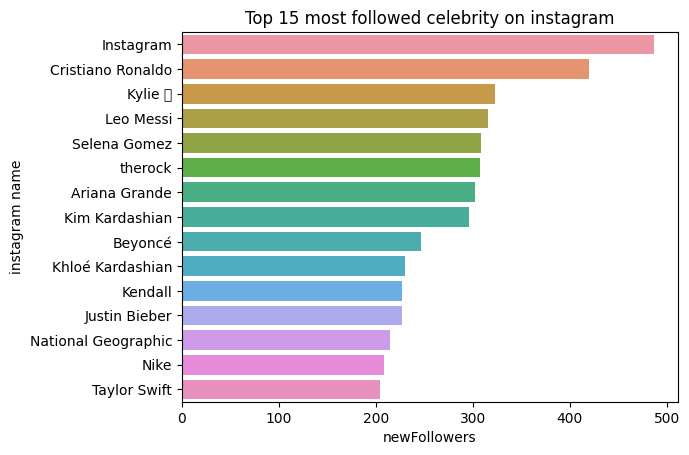

In [33]:
plt.title('Top 15 most followed celebrity on instagram')
plt.xlabel('Followers in Million')
sns.barplot(y='instagram name',x='newFollowers',data=ig_df.sort_values(by='newFollowers',ascending=False).head(15))

In [34]:
pallete=['red','green','yellow','salmon','cyan','blue','orange']

In [35]:
def plot(df):
    plt.figure(figsize=(8,6))
    plt.xlabel('number of times category occured')
    plt.ylabel('Category')
    df['Category'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

Popular Categories on Instagram

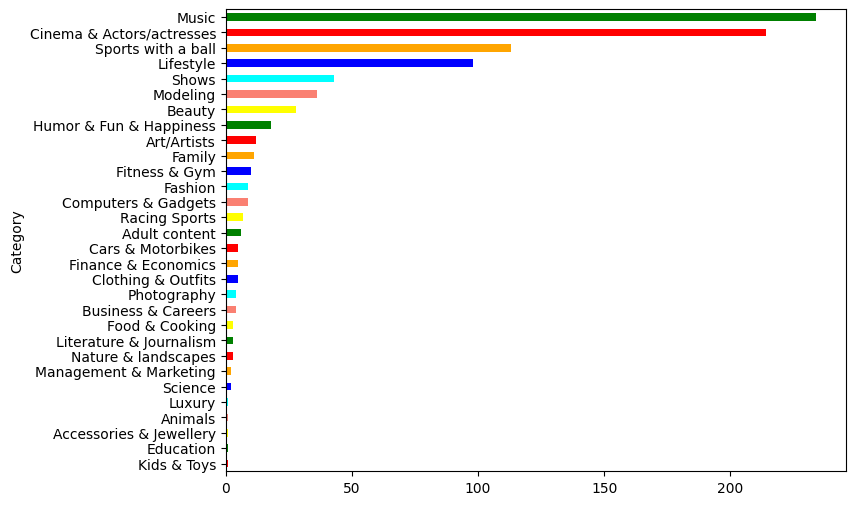

In [36]:
plot(ig_df)

In [37]:
def plot_c(df):
    plt.figure(figsize=(10,8))
    plt.xlabel('number of times category occured')
    df['Audience Country'].value_counts().sort_values().plot.barh(color=pallete)

Top consumers of Instagram content: Countries

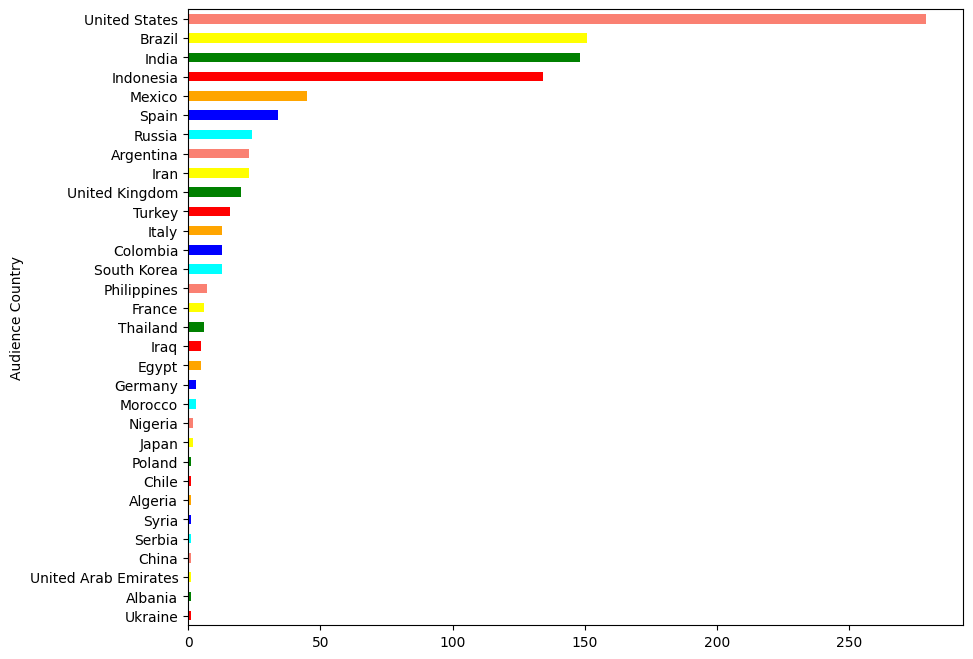

In [38]:
plot_c(ig_df)

In [39]:
def demand(data,category):
    return data[data['Category']==category]['Audience Country'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

<Axes: ylabel='Audience Country'>

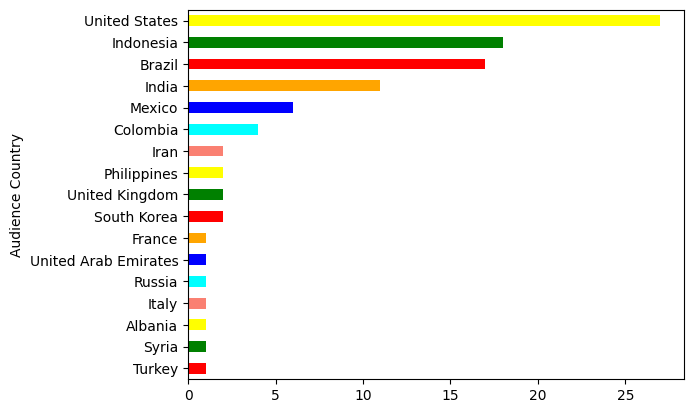

In [40]:
demand(ig_df,'Lifestyle')

<Axes: ylabel='Audience Country'>

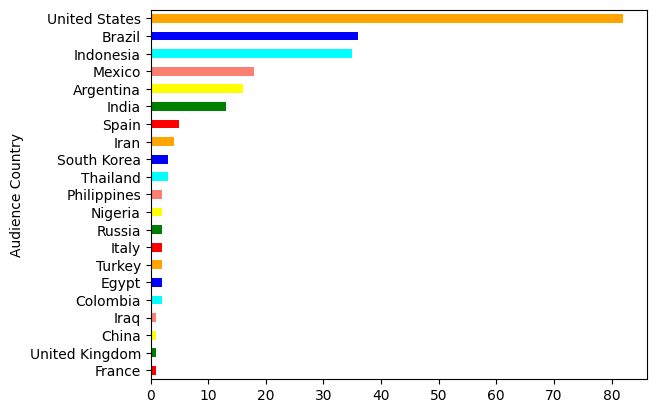

In [41]:
demand(ig_df,'Music')

<Axes: ylabel='Audience Country'>

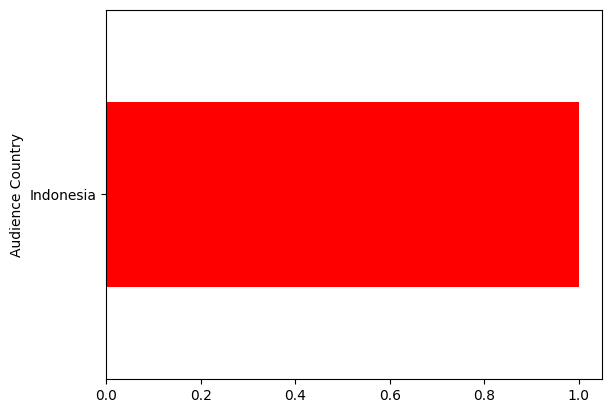

In [42]:
demand(ig_df,'Education')

<Axes: ylabel='Audience Country'>

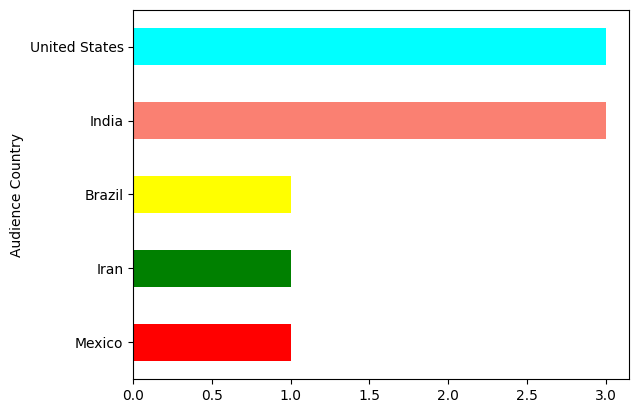

In [43]:
demand(ig_df,'Fashion')

<Axes: ylabel='Audience Country'>

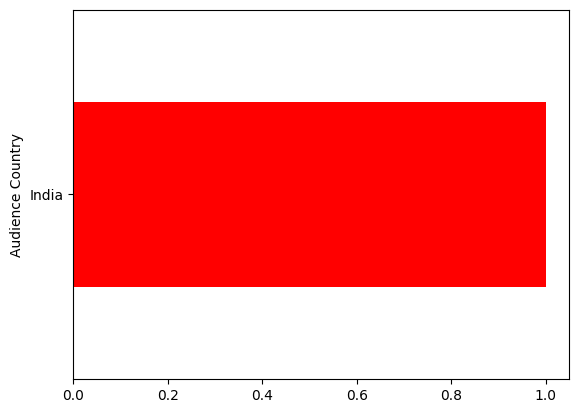

In [44]:
demand(ig_df,'Luxury')

<Axes: ylabel='Audience Country'>

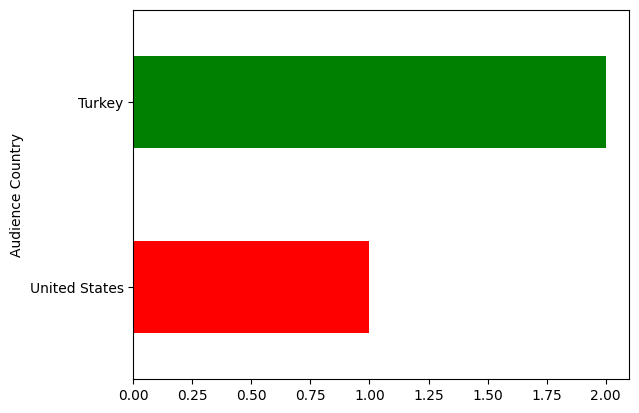

In [45]:
demand(ig_df,'Food & Cooking')

<Axes: ylabel='Audience Country'>

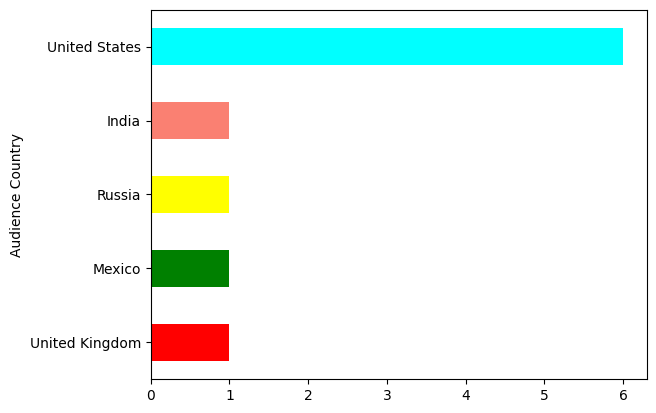

In [46]:
demand(ig_df,'Fitness & Gym')

In [47]:
ig_df[ig_df['Audience Country']=='India']['Category'].value_counts()

Category
Cinema & Actors/actresses    69
Sports with a ball           16
Music                        13
Lifestyle                    11
Beauty                        5
Shows                         4
Modeling                      4
Fashion                       3
Humor & Fun & Happiness       2
Computers & Gadgets           2
Art/Artists                   2
Luxury                        1
Science                       1
Finance & Economics           1
Fitness & Gym                 1
Adult content                 1
Photography                   1
Animals                       1
Family                        1
Cars & Motorbikes             1
Business & Careers            1
Name: count, dtype: int64

Accounts with medium level popularity by country and category

In [48]:
def mid_inf_ig(coun,cat):
    df1=ig_df[ig_df['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']<40]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]

In [49]:
mid_inf_ig('India', 'Lifestyle')

,instagram name,Followers,Engagement Rate
48,Ram Charan,5.6M,11.934
317,Georgina Rodríguez,36.5M,9.589
664,Nazriya Nazim Fahadh,5.5M,9.051
410,Janhvi Kapoor,16.1M,6.832
283,Esra Bilgic,6.7M,6.076
412,jasprit bumrah,9.5M,5.642
468,Kareena Kapoor Khan,8.9M,5.149
989,Yuzvendra Chahal,7.5M,5.060
69,Anjali Arora,11.1M,1.993
777,Riyaz Aly,26.1M,1.990


In [50]:
mid_inf_ig('United States', 'Lifestyle')

,instagram name,Followers,Engagement Rate
706,"Javon ""Wanna"" Walton",5.1M,33.333
868,Sydney Sweeney,11.8M,28.814
386,India,4M,27.500
941,†,5.6M,25.000
610,Maude Apatow,4.8M,19.898
354,NaN,7.4M,12.970
397,Jack Harlow,5.1M,12.125
582,Maddie Baby,6.7M,11.631
198,Cole LaBrant,5M,11.616
729,pokimane ❤,6M,11.580


Accounts with high level popularity by country and category

In [51]:
def high_inf_ig(coun,cat):
    df1=ig_df[ig_df['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']>40]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]

In [52]:
high_inf_ig('India', 'Lifestyle')

KeyError: 'Lifestyle'

In [53]:
high_inf_ig('India', 'Cinema & Actors/actresses')

,instagram name,Followers,Engagement Rate
781,Robert Downey Jr. Official,51.9M,4.046
39,Alia Bhatt 🤍☀️,61.8M,2.427
81,AnushkaSharma1588,57.5M,2.261
238,disha patani (paatni) 🦋,49.6M,2.218
360,Hrithik Roshan,41.9M,1.922
189,Chris Hemsworth,54M,1.848
823,Shraddha ✶,70.5M,1.844
411,Jannat Zubair Rahmani,41.2M,1.817
31,Akshay Kumar,61.1M,1.589
934,VarunDhawan,40.9M,1.204


In [54]:
high_inf_ig('United States', 'Lifestyle')

,instagram name,Followers,Engagement Rate
339,Hailey Rhode Baldwin Bieber,42.2M,5.687
180,cd,47.7M,3.983
504,Kourtney ❤️,166.4M,0.578
837,snoopdogg,71.8M,0.119


Youtube Analysis

In [55]:
yt_df.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


In [56]:
yt_df.isnull().sum()

youtuber name         0
channel name          0
Category            277
Subscribers           0
Audience Country    161
avg views             0
avg likes            38
avg comments        209
dtype: int64

In [57]:
yt_df.isna().sum()

youtuber name         0
channel name          0
Category            277
Subscribers           0
Audience Country    161
avg views             0
avg likes            38
avg comments        209
dtype: int64

Engagement Rate

In [58]:
yt_df.drop_duplicates(subset=['channel name'],inplace=True)

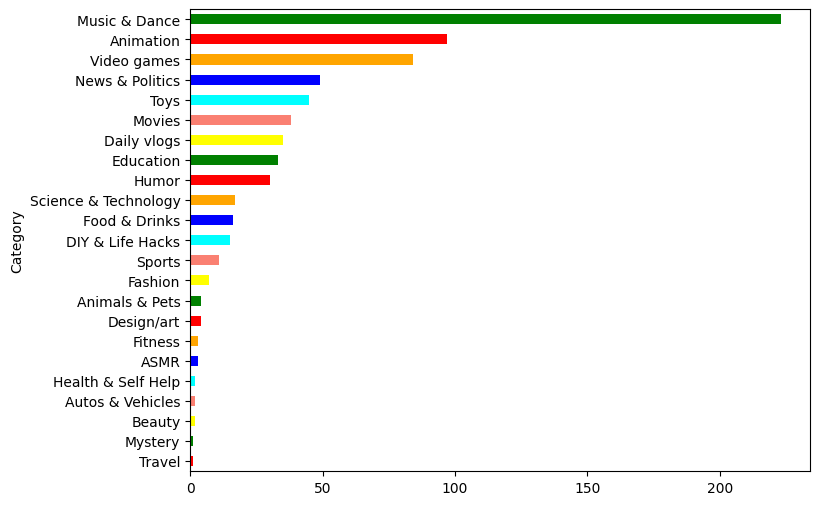

In [59]:
plot(yt_df)

TOP consumers of YouTube content: Countries

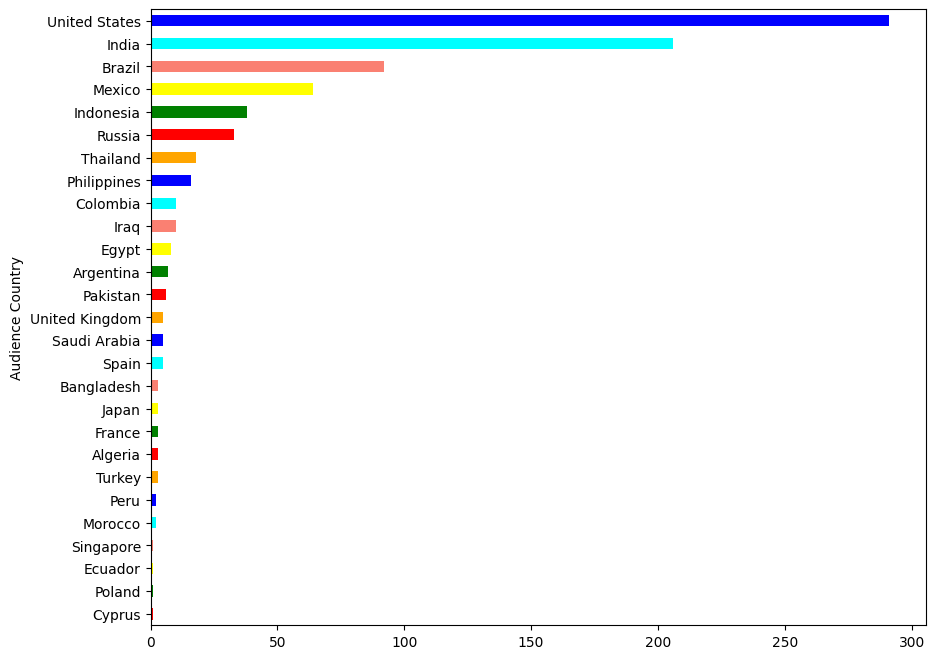

In [60]:
plot_c(yt_df)

<Axes: ylabel='Audience Country'>

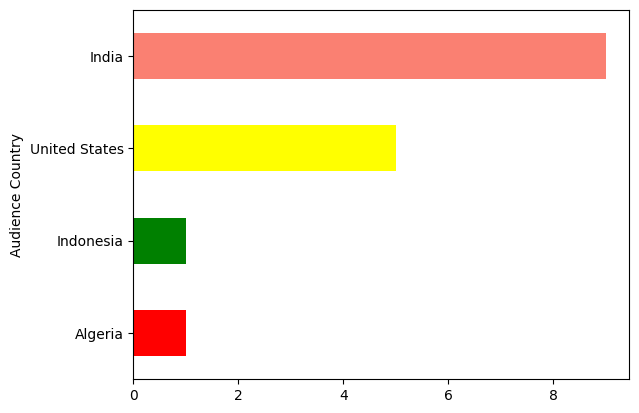

In [61]:
demand(yt_df, 'Education')

<Axes: ylabel='Audience Country'>

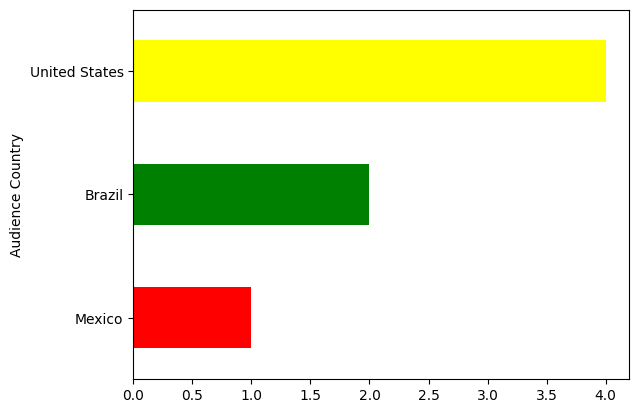

In [62]:
demand(yt_df, 'Fashion')

<Axes: ylabel='Audience Country'>

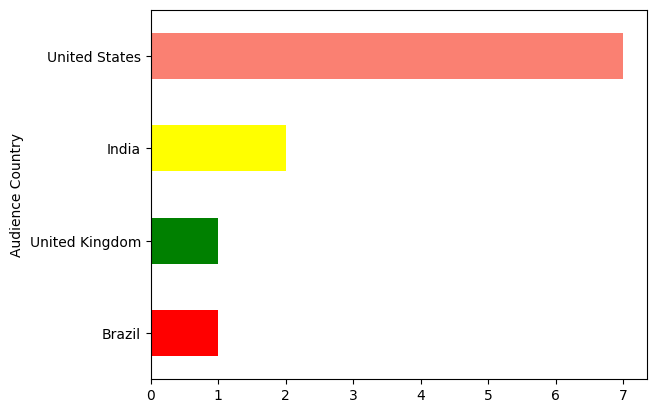

In [63]:
demand(yt_df, 'Sports')

TOP 15 most followed channels on YouTube

In [64]:
yt_df.iloc[0:10, [1,2,3]]

,channel name,Category,Subscribers
0,T-Series,Music & Dance,212.1M
1,Cocomelon - Nursery Rhymes,Education,132.1M
2,SET India,NaN,130.4M
3,PewDiePie,Animation,111.4M
4,MrBeast,Video games,92.5M
5,✿ Kids Diana Show,Animation,92.4M
6,Like Nastya,Animation,90.1M
7,WWE,Video games,86.9M
8,Zee Music Company,Music & Dance,82.7M
9,Vlad and Niki,Toys,80.4M


In [65]:
ly=['Subscribers','avg views', 'avg likes', 'avg comments']

In [66]:
yt_df.dropna(axis=0,how='any',subset=['avg likes','avg comments']).isnull().sum()

youtuber name         0
channel name          0
Category            215
Subscribers           0
Audience Country      0
avg views             0
avg likes             0
avg comments          0
dtype: int64

In [67]:
yt_df.dropna(axis=0,how='any',subset=['avg likes','avg comments'],inplace=True)

In [68]:
change(yt_df,ly)

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,newSubscribers,newavg views,newavg likes,newavg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212100000.0,323700.0,9800.0,290.0
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21,130400000.0,23600.0,314.0,21.0
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K,111400000.0,1400000.0,80800.0,4600.0
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K,92500000.0,30600000.0,1700000.0,67700.0
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163,86900000.0,76600.0,2800.0,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9.2M,Brazil,1.4M,110.1K,2.5K,9200000.0,1400000.0,110100.0,2500.0
996,EL GATO,EL GATO,Toys,9.2M,Brazil,243.8K,30.7K,636,9200000.0,243800.0,30700.0,636.0
997,CinemaSins,CinemaSins,Movies,9.2M,United States,296K,10.2K,874,9200000.0,296000.0,10200.0,874.0
998,CricketICC,ICC,Sports,9.2M,India,15.2K,854,58,9200000.0,15200.0,854.0,58.0


In [69]:
yt_df[yt_df['Audience Country']=='India']['Category'].value_counts()

Category
Music & Dance           50
News & Politics         15
Daily vlogs             11
Movies                   8
Education                8
Humor                    3
Animation                3
Sports                   2
ASMR                     1
Food & Drinks            1
Science & Technology     1
Name: count, dtype: int64

In [70]:
yt_df[yt_df['Audience Country']=='India'].groupby('Category').get_group('Animation')

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,newSubscribers,newavg views,newavg likes,newavg comments
640,Panda,Panda,Animation,11.6M,India,1.1M,103.7K,1.9K,11600000.0,1100000.0,103700.0,1900.0
710,Free Fire India Official,Free Fire India Official,Animation,11.1M,India,177.7K,15.6K,821,11100000.0,177700.0,15600.0,821.0
742,Dan Rhodes,Dan Rhodes,Animation,10.8M,India,334.1K,29.6K,211,10800000.0,334100.0,29600.0,211.0


Engagement Rate

In [71]:
yt_df['Engagement rate']=round(((yt_df['newavg comments']+yt_df['newavg likes']+yt_df['newavg views'])/yt_df['newSubscribers'])*100,3)

In [72]:
yt_df.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,newSubscribers,newavg views,newavg likes,newavg comments,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212100000.0,323700.0,9800.0,290.0,0.157
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21,130400000.0,23600.0,314.0,21.0,0.018
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K,111400000.0,1400000.0,80800.0,4600.0,1.333
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K,92500000.0,30600000.0,1700000.0,67700.0,34.992
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163,86900000.0,76600.0,2800.0,163.0,0.092


In [73]:
yt_df['newSubscribers']=yt_df['newSubscribers']/1000000
#for convenience

In [74]:
yt_df.drop(labels=['avg views', 'avg likes', 'avg comments','newavg views', 'newavg likes', 'newavg comments',
       ],axis=1,inplace=True)

In [75]:
yt_df['newSubscribers'].describe()

count    786.000000
mean      17.016921
std       13.593720
min        9.200000
25%       10.700000
50%       13.000000
75%       17.600000
max      212.100000
Name: newSubscribers, dtype: float64

In [76]:
yt_df['newSubscribers'].quantile(0.90)

28.25

Channels with mid level Subscriber count on youtube

In [77]:
def mid_yt(coun,cat):
    df1=yt_df[yt_df['Audience Country']==coun]
    df1_mini=df1[df1['newSubscribers']<=50]
    return df1_mini.sort_values(by='Engagement rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]

In [78]:
mid_yt('India', 'Music & Dance')

,youtuber name,Subscribers,Engagement rate
795,Sidhu Moose Wala,10.4M,41.298
76,Desi Music Factory,32.1M,35.327
657,Mor Haryanvi,11.5M,29.177
968,sonotektv,9.3M,17.586
719,hawkrecord,10.9M,9.353
289,Emiway Bantai,17.3M,5.655
941,timesmusicindia,9.5M,4.911
684,Sony Music South,11.3M,2.398
615,officialjassrecords,11.8M,1.930
77,Geet MP3,31.9M,1.280


In [79]:
mid_yt('United States', 'Music & Dance')

,youtuber name,Subscribers,Engagement rate
860,Juice WRLD,10M,79.277
914,Prince Royce,9.6M,74.629
717,YoungBoy Never Broke Again,10.9M,72.458
861,jordanmatter,10M,50.495
607,Migosatl,11.9M,28.876
...,...,...,...
886,htv2channel,9.8M,0.088
790,CJENMMUSIC,10.5M,0.087
960,POPSVIETNAM,9.4M,0.084
505,AtlanticVideos,13.1M,0.076


In [80]:
mid_yt('India', 'Education')

,youtuber name,Subscribers,Engagement rate
351,Khan GS Research Centre,15.6M,62.732
853,Hindi Countdown,10.1M,36.560
614,Dear Sir,11.9M,2.338
240,MrVivekBindra,18.8M,1.641
552,Knowledge Tv हिन्दी,12.5M,1.349
659,TsMadaan,11.5M,0.571
619,Study IQ education,11.7M,0.102
381,wifistudy,15M,0.054


In [81]:
mid_yt('United States', 'Education')

,youtuber name,Subscribers,Engagement rate
252,Kurzgesagt,18.2M,44.343
431,theslowmoguys,14.3M,8.922
835,BE AMAZED,10.1M,5.860
633,TheInfographicsShow,11.7M,3.076


In [82]:
mid_yt('India', 'Animation')

,youtuber name,Subscribers,Engagement rate
640,Panda,11.6M,10.393
742,Dan Rhodes,10.8M,3.370
710,Free Fire India Official,11.1M,1.749


In [83]:
mid_yt('United States', 'Animation')

,youtuber name,Subscribers,Engagement rate
118,MrBeast Gaming,26.5M,90.853
872,MSA previously My Story Animated,9.9M,56.149
588,Brawl Stars,12.1M,54.447
385,KSIOlajidebtHD,14.9M,35.162
631,TommyInnit,11.7M,31.701
530,ChallengeAcceptedInc,12.7M,31.408
272,Brent Rivera,17.6M,23.824
773,Flamingo,10.5M,20.718
223,PrestonPlayz,19.4M,14.805
343,failarmy,15.7M,14.144


In [84]:
mid_yt('India', 'Fashion')

KeyError: 'Fashion'

In [85]:
mid_yt('United States', 'Fashion')

,youtuber name,Subscribers,Engagement rate
938,Niki and Gabi,9.5M,5.381
653,Americanvogue,11.5M,2.938
367,JenniferLopez,15.3M,2.714
779,BuzzFeedYellow,10.5M,0.269


In [86]:
def high_yt(coun,cat):
    df1=yt_df[yt_df['Audience Country']==coun]
    df1_mini=df1[df1['newSubscribers']>50]
    return df1_mini.sort_values(by='Engagement rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]

In [87]:
high_yt('India', 'Music & Dance')

,youtuber name,Subscribers,Engagement rate
23,BHOJPURIWAVE,51.5M,0.170
0,tseries,212.1M,0.157
8,zeemusiccompany,82.7M,0.137
26,sonymusicindiaSME,50.3M,0.125
18,filmigaane,59.2M,0.110


In [88]:
high_yt('United States', 'Music & Dance')

,youtuber name,Subscribers,Engagement rate
14,BANGTANTV,65M,5.251
11,kidrauhl,68.1M,4.215
22,Marshmello,55M,1.251
16,ibighit,64.7M,0.721


In [89]:
high_yt('India', 'Animation')

KeyError: 'Animation'

In [90]:
high_yt('United States', 'Animation')

,youtuber name,Subscribers,Engagement rate
3,PewDiePie,111.4M,1.333


In [91]:
yt_df.head(5)

,youtuber name,channel name,Category,Subscribers,Audience Country,newSubscribers,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,212.1,0.157
2,setindia,SET India,NaN,130.4M,India,130.4,0.018
3,PewDiePie,PewDiePie,Animation,111.4M,United States,111.4,1.333
4,MrBeast6000,MrBeast,Video games,92.5M,United States,92.5,34.992
7,WWEFanNation,WWE,Video games,86.9M,United States,86.9,0.092


In [92]:
ig_df.head(5)

,instagram name,Category,category_2,Followers,Audience Country,Authentic engagement\r\n,newFollowers,Engagement Rate
0,433,Sports with a ball,NaN,48.5M,Spain,383.1K,48.5,1.313
1,TAEYANG,Music,NaN,12.7M,Indonesia,478K,12.7,4.270
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,18.8,2.010
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,13.5,10.370
4,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,11.1,27.928


In [93]:
idf = ig_df[['instagram name', 'Category', 'Followers', 'Audience Country', 'newFollowers', 'Engagement Rate']]

In [94]:
idf

,instagram name,Category,Followers,Audience Country,newFollowers,Engagement Rate
0,433,Sports with a ball,48.5M,Spain,48.5,1.313
1,TAEYANG,Music,12.7M,Indonesia,12.7,4.270
2,НАСТЯ ИВЛЕЕВА,Shows,18.8M,Russia,18.8,2.010
3,Joy,Lifestyle,13.5M,Indonesia,13.5,10.370
4,Jaehyun,NaN,11.1M,Indonesia,11.1,27.928
...,...,...,...,...,...,...
995,Zendaya,Cinema & Actors/actresses,136.1M,United States,136.1,6.319
996,zidane,Sports with a ball,31.2M,Spain,31.2,2.385
997,KAI,Music,13.9M,Indonesia,13.9,11.511
998,Zoë Kravitz,Cinema & Actors/actresses,8.2M,United States,8.2,10.799


In [95]:
idf['Platform'] = '1' # 1 for Instagram

C:\Users\riviv\AppData\Local\Temp\ipykernel_8696\4225959582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['Platform'] = '1' # 1 for Instagram


In [96]:
idf

,instagram name,Category,Followers,Audience Country,newFollowers,Engagement Rate,Platform
0,433,Sports with a ball,48.5M,Spain,48.5,1.313,1
1,TAEYANG,Music,12.7M,Indonesia,12.7,4.270,1
2,НАСТЯ ИВЛЕЕВА,Shows,18.8M,Russia,18.8,2.010,1
3,Joy,Lifestyle,13.5M,Indonesia,13.5,10.370,1
4,Jaehyun,NaN,11.1M,Indonesia,11.1,27.928,1
...,...,...,...,...,...,...,...
995,Zendaya,Cinema & Actors/actresses,136.1M,United States,136.1,6.319,1
996,zidane,Sports with a ball,31.2M,Spain,31.2,2.385,1
997,KAI,Music,13.9M,Indonesia,13.9,11.511,1
998,Zoë Kravitz,Cinema & Actors/actresses,8.2M,United States,8.2,10.799,1


In [97]:
idf.rename(columns = {'instagram name' : 'Name', 'newFollowers': 'New Followers'}, inplace = True)

C:\Users\riviv\AppData\Local\Temp\ipykernel_8696\3927886183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf.rename(columns = {'instagram name' : 'Name', 'newFollowers': 'New Followers'}, inplace = True)


In [98]:
idf

,Name,Category,Followers,Audience Country,New Followers,Engagement Rate,Platform
0,433,Sports with a ball,48.5M,Spain,48.5,1.313,1
1,TAEYANG,Music,12.7M,Indonesia,12.7,4.270,1
2,НАСТЯ ИВЛЕЕВА,Shows,18.8M,Russia,18.8,2.010,1
3,Joy,Lifestyle,13.5M,Indonesia,13.5,10.370,1
4,Jaehyun,NaN,11.1M,Indonesia,11.1,27.928,1
...,...,...,...,...,...,...,...
995,Zendaya,Cinema & Actors/actresses,136.1M,United States,136.1,6.319,1
996,zidane,Sports with a ball,31.2M,Spain,31.2,2.385,1
997,KAI,Music,13.9M,Indonesia,13.9,11.511,1
998,Zoë Kravitz,Cinema & Actors/actresses,8.2M,United States,8.2,10.799,1


In [99]:
yt_df.head(3)

,youtuber name,channel name,Category,Subscribers,Audience Country,newSubscribers,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,212.1,0.157
2,setindia,SET India,NaN,130.4M,India,130.4,0.018
3,PewDiePie,PewDiePie,Animation,111.4M,United States,111.4,1.333


In [100]:
ydf = yt_df[['channel name', 'Category', 'Subscribers', 'Audience Country', 'newSubscribers', 'Engagement rate']]

In [101]:
ydf

,channel name,Category,Subscribers,Audience Country,newSubscribers,Engagement rate
0,T-Series,Music & Dance,212.1M,India,212.1,0.157
2,SET India,NaN,130.4M,India,130.4,0.018
3,PewDiePie,Animation,111.4M,United States,111.4,1.333
4,MrBeast,Video games,92.5M,United States,92.5,34.992
7,WWE,Video games,86.9M,United States,86.9,0.092
...,...,...,...,...,...,...
995,FutParódias,Music & Dance,9.2M,Brazil,9.2,16.441
996,EL GATO,Toys,9.2M,Brazil,9.2,2.991
997,CinemaSins,Movies,9.2M,United States,9.2,3.338
998,ICC,Sports,9.2M,India,9.2,0.175


In [102]:
ydf['Platform'] = '0' # 0 for YouTube

In [103]:
ydf

,channel name,Category,Subscribers,Audience Country,newSubscribers,Engagement rate,Platform
0,T-Series,Music & Dance,212.1M,India,212.1,0.157,0
2,SET India,NaN,130.4M,India,130.4,0.018,0
3,PewDiePie,Animation,111.4M,United States,111.4,1.333,0
4,MrBeast,Video games,92.5M,United States,92.5,34.992,0
7,WWE,Video games,86.9M,United States,86.9,0.092,0
...,...,...,...,...,...,...,...
995,FutParódias,Music & Dance,9.2M,Brazil,9.2,16.441,0
996,EL GATO,Toys,9.2M,Brazil,9.2,2.991,0
997,CinemaSins,Movies,9.2M,United States,9.2,3.338,0
998,ICC,Sports,9.2M,India,9.2,0.175,0


In [104]:
ydf.rename(columns = {'channel name' : 'Name', 'Subscribers': 'Followers', 'newSubscribers': 'New Followers', 'Engagement rate' : 'Engagement Rate'}, inplace = True)

In [105]:
ydf.head(3)

,Name,Category,Followers,Audience Country,New Followers,Engagement Rate,Platform
0,T-Series,Music & Dance,212.1M,India,212.1,0.157,0
2,SET India,NaN,130.4M,India,130.4,0.018,0
3,PewDiePie,Animation,111.4M,United States,111.4,1.333,0


In [106]:
idf.head(3)

,Name,Category,Followers,Audience Country,New Followers,Engagement Rate,Platform
0,433,Sports with a ball,48.5M,Spain,48.5,1.313,1
1,TAEYANG,Music,12.7M,Indonesia,12.7,4.270,1
2,НАСТЯ ИВЛЕЕВА,Shows,18.8M,Russia,18.8,2.010,1


In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [108]:
idf['Engagement Rate'] = scaler.fit_transform(idf[['Engagement Rate']])
ydf['Engagement Rate'] = scaler.fit_transform(ydf[['Engagement Rate']])

C:\Users\riviv\AppData\Local\Temp\ipykernel_8696\1800456813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['Engagement Rate'] = scaler.fit_transform(idf[['Engagement Rate']])


In [109]:
#idf.drop(columns = ['scaled_Engagement Rate'], inplace = True)
#ydf.drop(columns = ['scaled_Engagement Rate'], inplace = True)

In [110]:
idf.head(1)

,Name,Category,Followers,Audience Country,New Followers,Engagement Rate,Platform
0,433,Sports with a ball,48.5M,Spain,48.5,0.012473,1


In [111]:
ydf.head(1)

,Name,Category,Followers,Audience Country,New Followers,Engagement Rate,Platform
0,T-Series,Music & Dance,212.1M,India,212.1,0.000232,0


In [112]:
df = pd.concat([idf, ydf], axis = 0)

In [113]:
df.reset_index(drop = True, inplace = True)

In [114]:
df

,Name,Category,Followers,Audience Country,New Followers,Engagement Rate,Platform
0,433,Sports with a ball,48.5M,Spain,48.5,0.012473,1
1,TAEYANG,Music,12.7M,Indonesia,12.7,0.041198,1
2,НАСТЯ ИВЛЕЕВА,Shows,18.8M,Russia,18.8,0.019244,1
3,Joy,Lifestyle,13.5M,Indonesia,13.5,0.100456,1
4,Jaehyun,NaN,11.1M,Indonesia,11.1,0.271019,1
...,...,...,...,...,...,...,...
1778,FutParódias,Music & Dance,9.2M,Brazil,9.2,0.024918,0
1779,EL GATO,Toys,9.2M,Brazil,9.2,0.004528,0
1780,CinemaSins,Movies,9.2M,United States,9.2,0.005054,0
1781,ICC,Sports,9.2M,India,9.2,0.000259,0


In the above few cells, we added an new column to instagram dataframe and youtube dataframe where '1' signifies Instagram and '0' signifies YouTube. We then scaled all the other numerical data in both the dataframes to bring them to a range of 0 - 1. We then merged both the dataframes into one new data frame.

Now, we further try to remove redundency in the data.

In [115]:
df['Audience Country'].nunique()

37

In [116]:
df['Category'].nunique()

50

In [117]:
df['Category'].unique()

array(['Sports with a ball', 'Music', 'Shows', 'Lifestyle', nan,
       'Humor & Fun & Happiness', 'Cinema & Actors/actresses', 'Beauty',
       'Clothing & Outfits', 'Fashion', 'Modeling', 'Food & Cooking',
       'Family', 'Fitness & Gym', 'Computers & Gadgets', 'Art/Artists',
       'Finance & Economics', 'Cars & Motorbikes', 'Photography',
       'Racing Sports', 'Literature & Journalism', 'Business & Careers',
       'Animals', 'Nature & landscapes', 'Adult content',
       'Accessories & Jewellery', 'Education', 'Management & Marketing',
       'Luxury', 'Science', 'Kids & Toys', 'Music & Dance', 'Animation',
       'Video games', 'Movies', 'News & Politics', 'Daily vlogs', 'Humor',
       'Toys', 'Design/art', 'Fitness', 'DIY & Life Hacks',
       'Food & Drinks', 'Sports', 'ASMR', 'Science & Technology',
       'Health & Self Help', 'Autos & Vehicles', 'Animals & Pets',
       'Mystery', 'Travel'], dtype=object)

In [118]:
df['Category'] = df['Category'].replace('Animals & Pets', 'Animals')

In [119]:
df['Category'] = df['Category'].replace('Toys', 'Kids & Toys')

In [120]:
df['Category'] = df['Category'].replace('Accessories & Jewellery', 'Fashion')

In [121]:
df['Category'] = df['Category'].replace('Sports with a ball', 'Sports')

In [122]:
df['Category'] = df['Category'].replace('Music', 'Music & Dance')

In [123]:
df['Category'] = df['Category'].replace('Clothing & Outfits', 'Fashion')

In [124]:
df['Category'] = df['Category'].replace('Fitness', 'Fitness & Gym')

In [125]:
df['Category'] = df['Category'].replace('Racing Sports', 'Sports')

In [126]:
df['Category'] = df['Category'].replace('Food & Drinks', 'Food & Cooking')

In [127]:
df['Category'] = df['Category'].replace('Computers & Gadgets', 'Science & Technology')

In [128]:
df['Category'] = df['Category'].replace('Science', 'Science & Technology')

In [129]:
df['Category'] = df['Category'].replace('Movies', 'Cinema & Actors/actresses')

In [130]:
df['Category'] = df['Category'].replace('Cinema & Actors/actresses', 'Cinema')

In [131]:
df['Category'] = df['Category'].replace('Humor', 'Humor & Fun & Happiness')

In [132]:
df['Category'] = df['Category'].replace('Art/Artists', 'Design/art')

In [133]:
df['Category'] = df['Category'].replace('Cars & Motorbikes', 'Autos & Vehicles')

In [134]:
df['Category'].unique()

array(['Sports', 'Music & Dance', 'Shows', 'Lifestyle', nan,
       'Humor & Fun & Happiness', 'Cinema', 'Beauty', 'Fashion',
       'Modeling', 'Food & Cooking', 'Family', 'Fitness & Gym',
       'Science & Technology', 'Design/art', 'Finance & Economics',
       'Autos & Vehicles', 'Photography', 'Literature & Journalism',
       'Business & Careers', 'Animals', 'Nature & landscapes',
       'Adult content', 'Education', 'Management & Marketing', 'Luxury',
       'Kids & Toys', 'Animation', 'Video games', 'News & Politics',
       'Daily vlogs', 'DIY & Life Hacks', 'ASMR', 'Health & Self Help',
       'Mystery', 'Travel'], dtype=object)

In [135]:
df['Category'].nunique()

35

In [136]:
df['Audience Country'].value_counts()

Audience Country
United States           554
India                   343
Brazil                  237
Indonesia               168
Mexico                  106
Russia                   55
Spain                    38
Argentina                30
United Kingdom           25
Thailand                 24
Iran                     23
Philippines              23
Colombia                 22
Turkey                   19
Iraq                     14
South Korea              13
Egypt                    13
Italy                    13
France                    8
Pakistan                  6
Morocco                   5
Japan                     5
Algeria                   4
Saudi Arabia              4
Bangladesh                3
Germany                   3
Nigeria                   2
Ecuador                   1
Ukraine                   1
United Arab Emirates      1
Syria                     1
China                     1
Chile                     1
Albania                   1
Serbia                    1
Pol

The data frame 'df' was formed by concatenation two datafrmes one over the other. This resulted in the dataframe having instagram data in the first half and youtube in the second half. This caused overfitting. Therefore, we shuffled the dataframe to increase randomness in the data.

In [137]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [138]:
df_shuffled

,Name,Category,Followers,Audience Country,New Followers,Engagement Rate,Platform
0,Sidhu Moosewala (ਮੂਸੇ ਆਲਾ),NaN,6.9M,India,6.9,0.062385,1
1,Lulu99,NaN,11.9M,Colombia,11.9,0.008073,0
2,Dhanush,Cinema,4.2M,India,4.2,0.204709,1
3,Sai Pallavi,NaN,5.3M,India,5.3,0.171885,1
4,RM,NaN,31.3M,NaN,31.3,0.266628,1
...,...,...,...,...,...,...,...
1778,FaZe Rug,Video games,20.8M,United States,20.8,0.019030,0
1779,5-Minute Crafts FAMILY,NaN,14.6M,United States,14.6,0.000220,0
1780,Subhan Mamedov,Shows,9M,Russia,9.0,0.038614,1
1781,NORMAN FAIT DES VIDÉOS,Animation,12.1M,France,12.1,0.024739,0


Model Selection

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

We did not consider the 'Name' attribute because name does not contribute much to the engagement rate. New Followers was discarded because it had a slight negative effect on the performance of the models.

In [141]:
X = df_shuffled[['Category', 'Followers', 'Audience Country', 'Platform']]
y = df_shuffled['Engagement Rate']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
X_train['Category'] = X_train['Category'].fillna('Unknown')
X_train['Audience Country'] = X_train['Audience Country'].fillna('Unknown')

In [144]:
X_train.isnull().count()

Category            1426
Followers           1426
Audience Country    1426
Platform            1426
dtype: int64

Models can take only numerical data as input. Hence, we converted all the categorical data and string data to numerical data. This was done by removing the 'M' which stands for 'Million' in the Followers column, and applying One Hot Encoding in 'Category' and 'Audience Country' columns.

In [145]:
X_train['Followers'] = X_train['Followers'].str.replace('M', '').astype(float)
X_test['Followers'] = X_test['Followers'].str.replace('M', '').astype(float)

In [146]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [147]:
transformer = ColumnTransformer(transformers = [
    ('tnf1', OneHotEncoder(sparse = False, drop  = 'first', handle_unknown='ignore'), ['Category', 'Audience Country'])
], remainder = 'passthrough')

In [148]:
transformer.fit_transform(X_train).shape

C:\Users\riviv\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(1426, 71)

In [149]:
transformer.transform(X_test).shape

C:\Users\riviv\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(357, 71)

In [150]:
X_test['Category'].nunique()

27

In [151]:
# Concatenate training and testing datasets
combined_data = pd.concat([X_train, X_test])

# Fill NaN values with 'Unknown'
combined_data['Category'] = combined_data['Category'].fillna('Unknown')
combined_data['Audience Country'] = combined_data['Audience Country'].fillna('Unknown')

# Apply one-hot encoding
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse=False, drop='first', handle_unknown='error'), ['Category', 'Audience Country'])
], remainder='passthrough')

# Fit and transform the combined dataset
X_encoded = transformer.fit_transform(combined_data)

# Split the encoded dataset back into training and testing datasets
X_train_encoded = X_encoded[:len(X_train)]
X_test_encoded = X_encoded[len(X_train):]

# Now, you can use X_train_encoded and X_test_encoded for further analysis


C:\Users\riviv\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


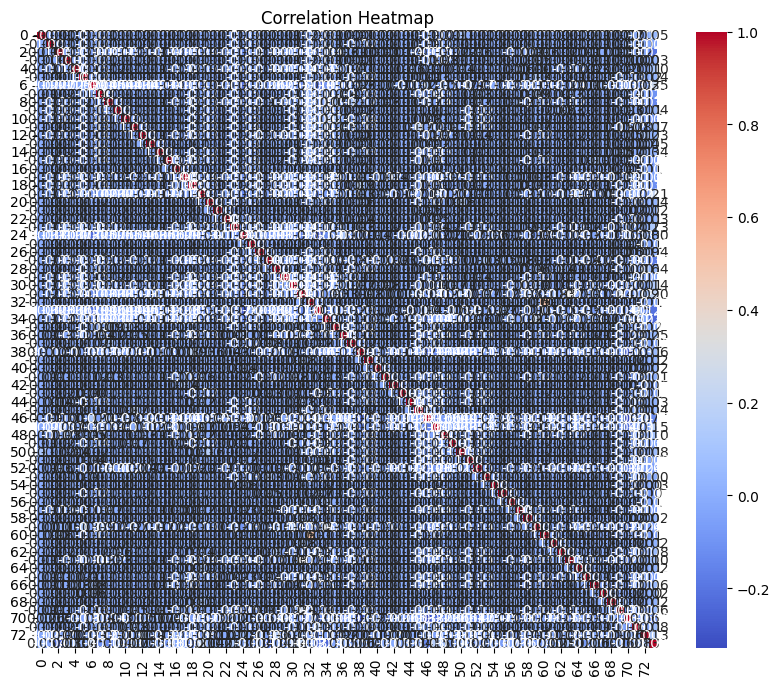

In [198]:
import seaborn as sns

X_encoded_df = pd.DataFrame(X_encoded)
# Calculate correlation matrix
corr_matrix = X_encoded_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df_shuffled.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


To find the best model for our project and also to fulfil a major objective of or peoject, that is, a comparative study of various models on the data, we are going to apply GridSearchCV.

In [152]:
param_grid_rf = { #defining the parameter grid
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_lr = {
    'fit_intercept': [True, False],  
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3]
}

param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}


In [153]:
rf_model = RandomForestRegressor() 
lr_model = LinearRegression()
xgb_model = xgb.XGBRegressor()
svr_model = SVR()
mlp_model = MLPRegressor()

In [154]:
models = {
    'RandomForestRegressor': (rf_model, param_grid_rf),
    'LinearRegression': (lr_model, param_grid_lr),
    'XGBoost': (xgb_model, param_grid_xgb),
    'SVR': (svr_model, param_grid_svr),
    'MLPRegressor': (mlp_model, param_grid_mlp)
}

In [155]:
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
    grid_search.fit(X_train_encoded, y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for RandomForestRegressor: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}
Best score for RandomForestRegressor: 0.46423215335798995
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters for LinearRegression: {'fit_intercept': False}
Best score for LinearRegression: 0.296384111190127
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score for XGBoost: 0.46037839988749
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVR: {'C': 10, 'kernel': 'rbf'}
Best score for SVR: -0.22032182638654313
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for MLPRegressor: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}
Best score for MLPRegressor: 0.42215177343650634


We used R2 Score as the performance indicator. Random Forest performed the best, closely followed by XGBoost. For better understanding, we trained all the models on the data.

Support Vector Regressor

In [156]:
best_svr_model = SVR(C=10, kernel='rbf')

In [157]:
best_svr_model.fit(X_train_encoded, y_train)

SVR(C=10)

Mean Absolute Error: 0.06013982981618493
Mean Squared Error: 0.004377141682951159
Root Mean Squared Error: 0.06615997039714543
R-squared Score: -0.2871184760390213


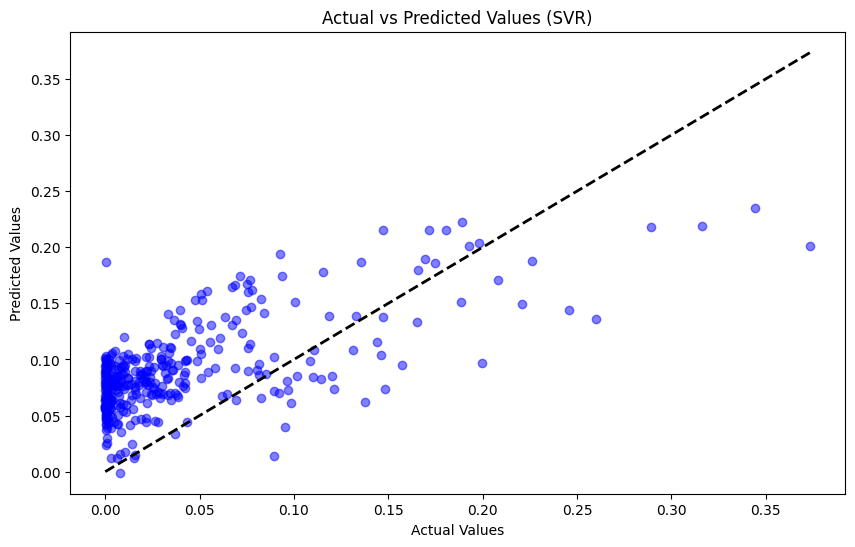

In [158]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

y_pred = best_svr_model.predict(X_test_encoded)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculating RMSE from MSE
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (SVR)")
plt.show()


Linear Regression

In [160]:
best_lr_model = LinearRegression(fit_intercept=False)

In [161]:
best_lr_model.fit(X_train_encoded, y_train)

LinearRegression(fit_intercept=False)

Mean Absolute Error: 0.03152751467691429
Mean Squared Error: 0.001976500967655986
Root Mean Squared Error: 0.04445785608479098
R-squared Score: 0.4188008756289988


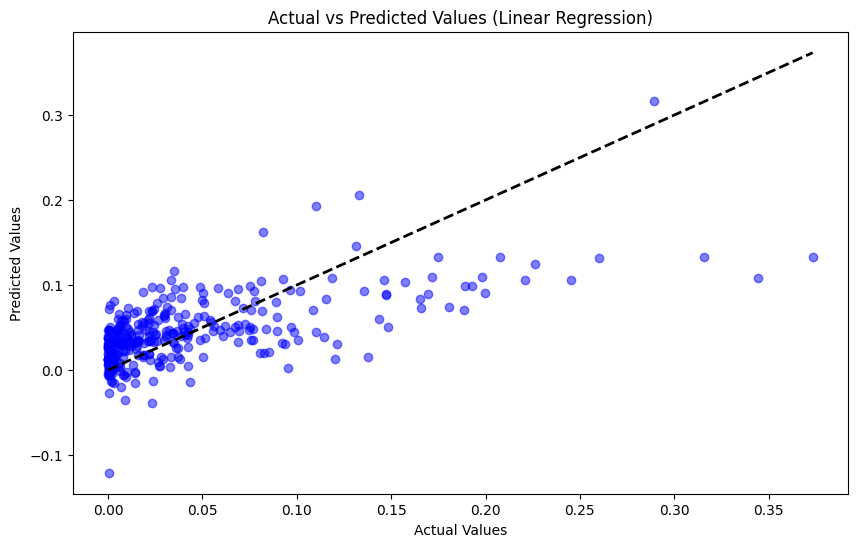

In [162]:
y_pred = best_lr_model.predict(X_test_encoded)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculating RMSE from MSE
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()


Multi Level Perceptron

In [163]:
#best_mlp_model = MLPRegressor(activation='tanh', alpha=0.1, hidden_layer_sizes=(200,))
#Best parameters for MLPRegressor: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}
best_mlp_model = MLPRegressor(activation='tanh', alpha=0.1, hidden_layer_sizes=(50,50))


In [165]:
best_mlp_model.fit(X_train_encoded, y_train)

MLPRegressor(activation='tanh', alpha=0.1, hidden_layer_sizes=(50, 50))

Mean Absolute Error: 0.023155341657350517
Mean Squared Error: 0.001214036863660626
Root Mean Squared Error: 0.034843031780552994
R-squared Score: 0.6430069230117965


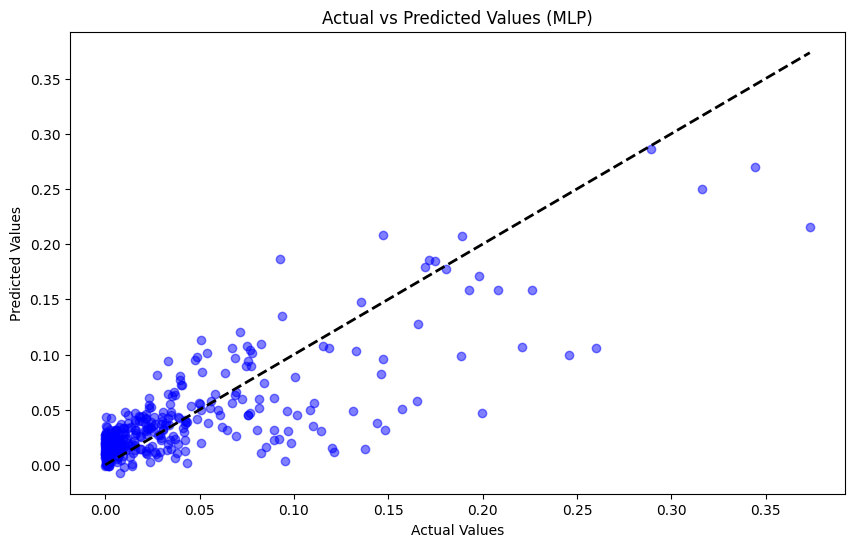

In [166]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

y_pred = best_mlp_model.predict(X_test_encoded)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculating RMSE from MSE
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (MLP)")
plt.show()


Random Forest

In [167]:
best_rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=20, min_samples_leaf=3, max_features=0.3, max_leaf_nodes=50, bootstrap=False)
#Best parameters for RandomForestRegressor: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300





In [168]:
best_rf_model.fit(X_train_encoded, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features=0.3,
                      max_leaf_nodes=50, min_samples_leaf=3,
                      min_samples_split=20, n_estimators=200)

Mean Absolute Error: 0.02202673988692329
Mean Squared Error: 0.0011057952691295222
Root Mean Squared Error: 0.033253500103440574
R-squared Score: 0.6748358575741741


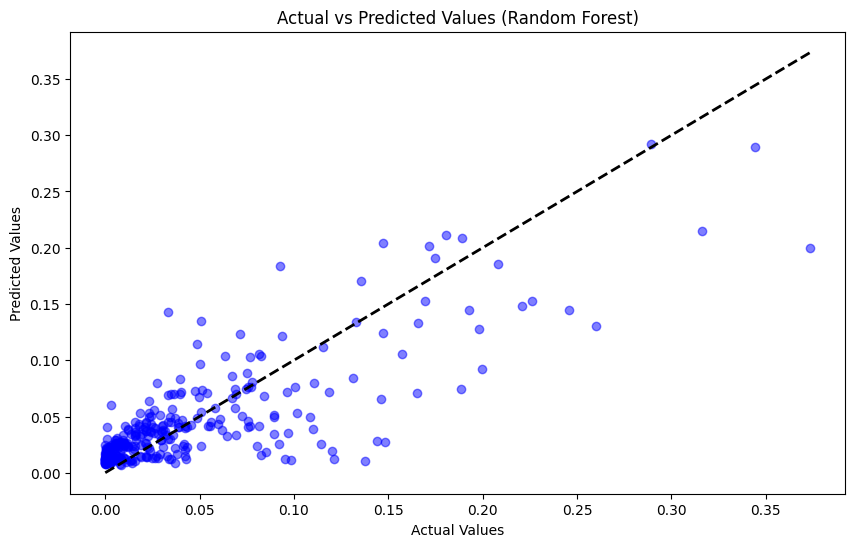

In [169]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

y_pred = best_rf_model.predict(X_test_encoded)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculating RMSE from MSE
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest)")
plt.show()


XGBoost

In [170]:
best_xgb_model = xgb.XGBRegressor(learning_rate=0.2, max_depth=3, subsample=0.9, colsample_bytree=0.8, min_child_weight=1, reg_alpha=0.07, n_estimators=100)
#Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [171]:
best_xgb_model.fit(X_train_encoded, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Mean Absolute Error: 0.022165556709814477
Mean Squared Error: 0.0011365455718463117
Root Mean Squared Error: 0.03371269155446227
R-squared Score: 0.6657935908080027


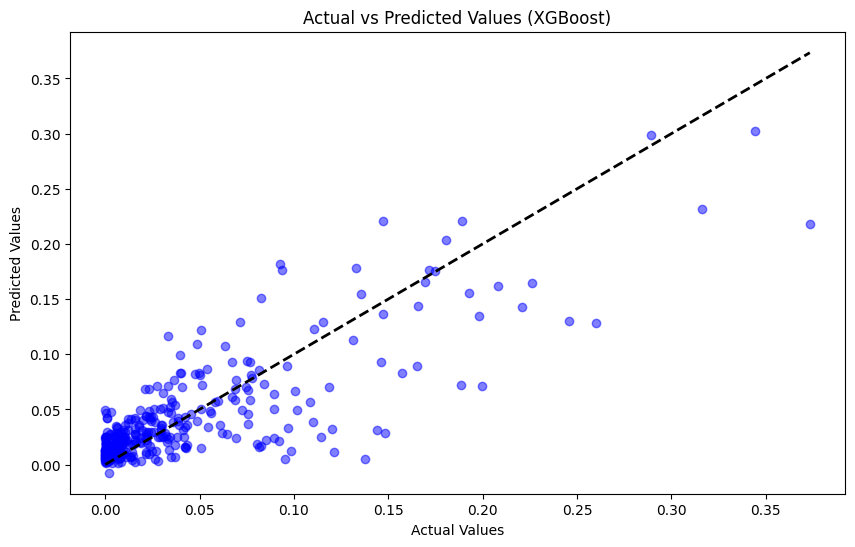

In [172]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

y_pred = best_xgb_model.predict(X_test_encoded)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculating RMSE from MSE
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (XGBoost)")
plt.show()


The most efficient models are:
1 - Random Forest
2 - XGBoost
3 - MLPRegressor

Conclusion: Random Forest is the best model for training and making predictions on this data with evaluation metric values:

Mean Absolute Error: 0.021974700575100026

Mean Squared Error: 0.0011007568227802986

Root Mean Squared Error: 0.03317765547443488

R-squared Score: 0.6763174357035447